# Lorentzian fits

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

## load a reference spectrum

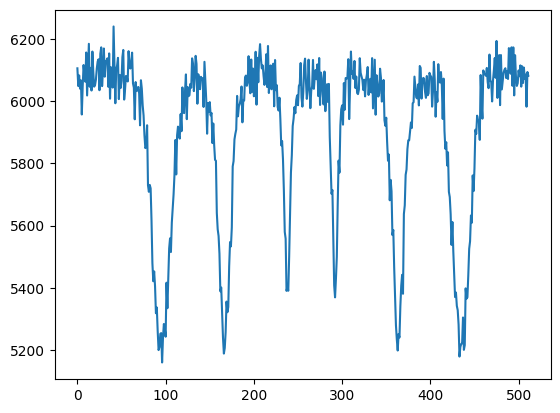

In [2]:
intensity = np.loadtxt('Fe_alpha_spectrum_wide.txt')  

plt.plot(intensity)
plt.show()

## Calibrate experimental data

In [3]:
v = 8.3
shift = 0.0

velocities, offset, scaling, vel_theo, int_theo = nx.data.CalibrateChannelsAlphaFe(
                                                    intensity = intensity,
                                                    velocity= v,
                                                    thickness = 10e3,
                                                    Bhf = 33,
                                                    B_fwhm = 0,
                                                    emission = False,
                                                    mode = "constant",
                                                    shift = shift)

print("offset: {}".format(offset))
print("scaling: {}".format(scaling))
print("max velocity in experiment: {}".format(v*scaling))

offset: 0.2984457424419875
scaling: 0.9640094900763775
max velocity in experiment: 8.001278767633934


## Get all Lorentzian parameters

6
[ 96 166 237 292 363 433]
[-5.32343891 -3.07623523 -0.84989063  0.84587022  3.08106944  5.32568594]
[-980.29960994 -936.81445869 -742.80437663 -741.84550823 -921.26440193
 -976.354091  ]
[0.70463931 0.46580686 0.27141206 0.25158584 0.45156314 0.667414  ]
[2170.07912498 1370.91123387  633.36414635  586.34002891 1306.93097362
 2047.16353102]
6150.561289939077


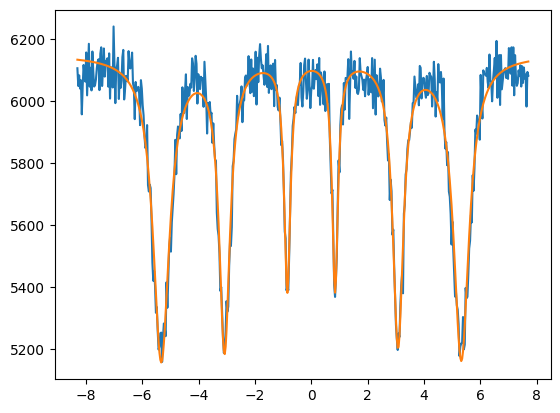

In [4]:
n_lor, indices_lor, velocity_lor, intensities_lor, widths_lor, areas_lor, baseline_lor, fit_curve = nx.data.GetLorentzian(
                                                                                                      velocities,
                                                                                                      intensity,
                                                                                                      n=6,
                                                                                                      neg=True,
                                                                                                      baseline=None
                                                                                                      )

print(n_lor)
print(indices_lor)
print(velocity_lor)
print(intensities_lor)
print(widths_lor)
print(areas_lor)
print(baseline_lor)

plt.plot(velocities, intensity)
plt.plot(velocities, fit_curve)
plt.show()

## Get just the linewidth of each peak

In [5]:
widths = nx.data.GetLinewidths(velocities, intensity, n=6, neg=True)

print(widths)

[0.70463931 0.46580686 0.27141206 0.25158584 0.45156314 0.667414  ]


## Get the processed areas of each peak

In [6]:
folded_areas, area_ratio = nx.data.GetAreas(velocities,
                                            intensity,
                                            n=6,
                                            neg=True,
                                            norm = "min")

print(folded_areas)
print(area_ratio)

[4217.242656   2677.84220749 1219.70417527]
[3.45759467 2.19548499 1.        ]
